# Algorytm Monte Carlo - estymacja liczby π

### Projekt przygotowany przez Izabelę Karczewską
Importuję potrzebne biblioteki

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Funkcje
Przygotowuję trzy funkcje, które ułatwią mi obliczenia i rysowanie wykresów. funkcję generującą zbiór punktów

In [2]:
def generate_points(n, r=1):
    x = np.random.uniform(0, r, n)
    y = np.random.uniform(0, r, n)
    return pd.DataFrame({"X":x, "Y":y})

In [3]:
def count_points_in_circle(points, r = 1):
    points_inside_circle = 0
    points["In_circle"]= 0
    for i in range(0,len(points)):
        fi = math.sqrt(r**2-points.X.iloc[i]**2)
        if points.Y.iloc[i] <= fi:
            points_inside_circle += 1
            points.loc[i, "In_circle"] = 1
    return points_inside_circle        

In [4]:
def estimate_pi(n_inside, n_total):
    return 4*n_inside/n_total

### Generuję wszystkie potrzebne dane. Używam wszystkich funkcji stworzonych przeze mnie dla:
* n = 100
* n = 1000
* n = 10000

In [5]:
points_100 = generate_points(100)
points_1000 = generate_points(1000)
points_10000 = generate_points(10000)

n100 = count_points_in_circle(points_100)
n1000 = count_points_in_circle(points_1000)
n10000 = count_points_in_circle(points_10000)

pi100 = estimate_pi(n100, len(points_100))
pi1000 = estimate_pi(n1000, len(points_1000))
pi10000 = estimate_pi(n10000, len(points_10000))

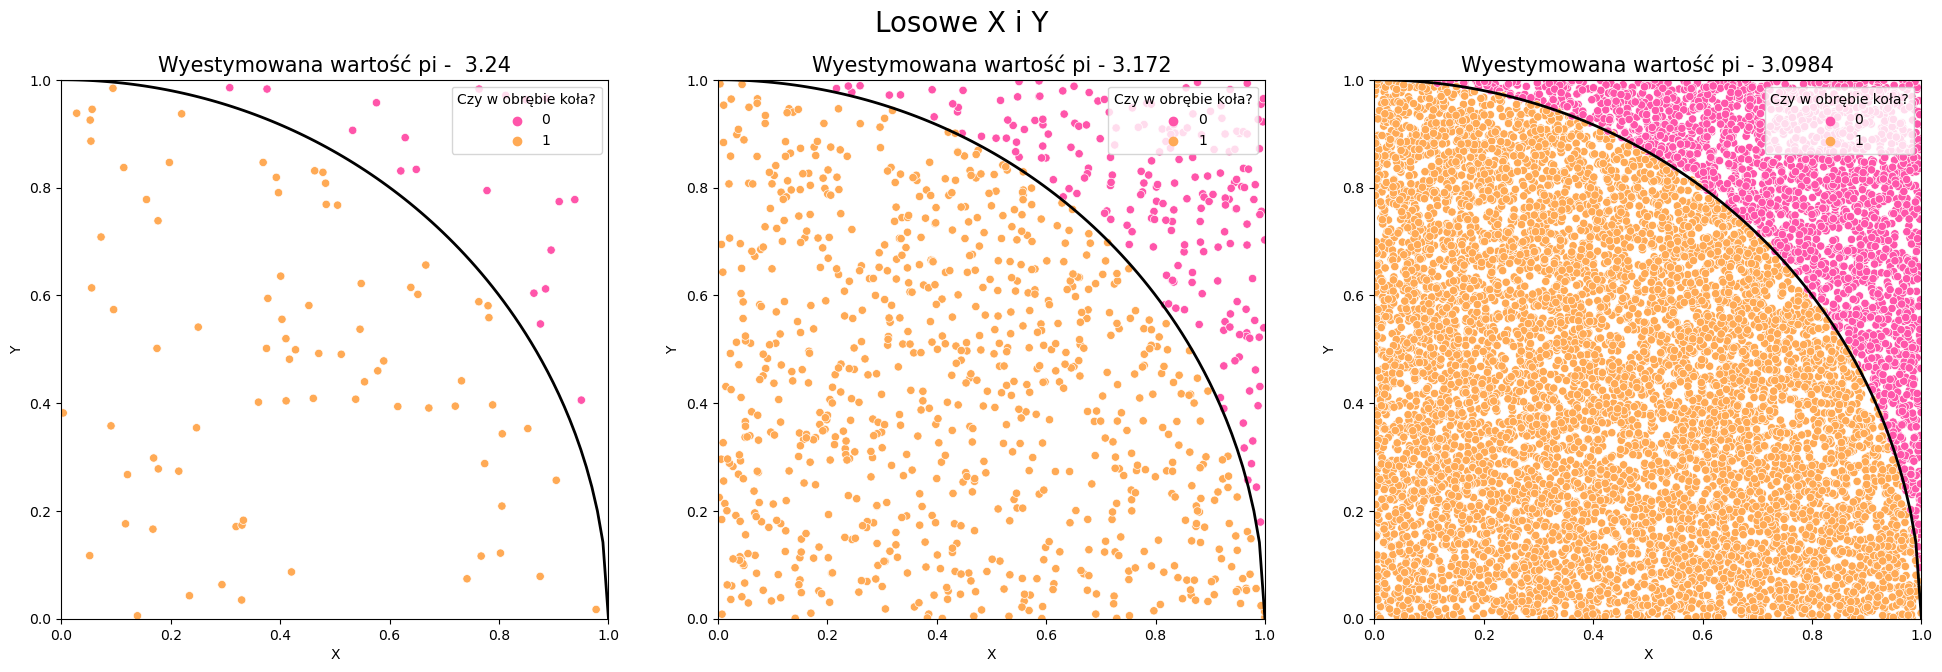

In [10]:
# Generuje punkty do narysowania okręgu
x_circle = np.linspace(0, 1, num=100)
y_circle = np.sqrt(1-x_circle**2)

fig, ax = plt.subplots(1,3, figsize = (24,7))
fig.suptitle("Losowe X i Y", fontsize=20)
ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1)
ax[0].set_title(f'Wyestymowana wartość pi -  {pi100}', fontsize=15)
sns.scatterplot(data=points_100, x="X", y="Y", ax=ax[0], hue="In_circle", palette="spring")
sns.lineplot(x = x_circle, y = y_circle, ax=ax[0], color="black", linewidth=2)
ax[0].legend(title="Czy w obrębie koła?", loc="upper right")

ax[1].set_xlim(0,1)
ax[1].set_ylim(0,1)
ax[1].set_title(f'Wyestymowana wartość pi - {pi1000}', fontsize=15)
sns.scatterplot(data=points_1000, x="X", y="Y", ax=ax[1], hue="In_circle", palette="spring")
sns.lineplot(x = x_circle, y = y_circle, ax=ax[1], color="black", linewidth=2)
ax[1].legend(title="Czy w obrębie koła?", loc="upper right")

ax[2].set_xlim(0,1)
ax[2].set_ylim(0,1)
ax[2].set_title(f'Wyestymowana wartość pi - {pi10000}', fontsize=15)
sns.scatterplot(data=points_10000, x="X", y="Y", ax=ax[2], hue="In_circle", palette="spring")
sns.lineplot(x = x_circle, y = y_circle, ax=ax[2], color="black", linewidth=2)
ax[2].legend(title="Czy w obrębie koła?", loc="upper right")